In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np
import statsmodels.api as sm

In [2]:
#read the files

file1 = "Output/cleanTvshows.csv"
file2 = "Output/cleanMovies.csv"

tv = pd.read_csv(file1)
movies = pd.read_csv(file2)

# TV Shows

In [3]:
tv.head()

,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18.0,9.5,1,0,0,0,1
1,Stranger Things,2016,16.0,8.8,1,0,0,0,1
2,Money Heist,2017,18.0,8.4,1,0,0,0,1
3,Sherlock,2010,16.0,9.1,1,0,0,0,1
4,Better Call Saul,2015,18.0,8.7,1,0,0,0,1


In [4]:
service = []
for index,row in tv.iterrows():
    if (row['Netflix'] == 1) & (row['Hulu'] == 0) & (row['Prime Video'] == 0) & (row['Disney+'] == 0):
        service.append('Netflix')
    elif (row['Netflix'] == 0) & (row['Hulu'] == 1) & (row['Prime Video'] == 0) & (row['Disney+'] == 0):
        service.append('Hulu')
    elif (row['Netflix'] == 0) & (row['Hulu'] == 0) & (row['Prime Video'] == 1) & (row['Disney+'] == 0):
        service.append('Prime Video')
    elif (row['Netflix'] == 0) & (row['Hulu'] == 0) & (row['Prime Video'] == 0) & (row['Disney+'] == 1):
        service.append('Disney+')
    else:
        service.append("Multiple")
tv['Service'] = service

In [5]:
tv = tv.loc[:, ['Title', 'Year', 'IMDb', 'Netflix','Hulu','Prime Video','Disney+','type','Service']]
tv = tv.dropna()
tv.head()

,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,type,Service
0,Breaking Bad,2008,9.5,1,0,0,0,1,Netflix
1,Stranger Things,2016,8.8,1,0,0,0,1,Netflix
2,Money Heist,2017,8.4,1,0,0,0,1,Netflix
3,Sherlock,2010,9.1,1,0,0,0,1,Netflix
4,Better Call Saul,2015,8.7,1,0,0,0,1,Netflix


In [6]:
tv_service = tv.groupby("Service")

tv_count = tv_service["IMDb"].count()
tv_avg = tv_service["IMDb"].mean()
tv_med = tv_service["IMDb"].median()
tv_var = tv_service["IMDb"].var()
tv_std = tv_service["IMDb"].std()
tv_sem = tv_service["IMDb"].sem()

#build dataframe
summTable = pd.DataFrame()
summTable["Total TV Shows"] = tv_count
summTable["Average IMDb Score"] = tv_avg
summTable["Median IMDb Score"] = tv_med
summTable["Variance of IMDb Score"] = tv_var
summTable["St. Deviation of IMDb Score"] = tv_std
summTable["St. Error IMDb Score"] = tv_sem

summTable

,Total TV Shows,Average IMDb Score,Median IMDb Score,Variance of IMDb Score,St. Deviation of IMDb Score,St. Error IMDb Score
Service,,,,,,
Disney+,146,6.910959,6.95,1.156569,1.075439,0.089004
Hulu,1251,6.992806,7.20,1.426124,1.194204,0.033764
Multiple,322,7.289441,7.50,1.379327,1.174448,0.065449
Netflix,1637,7.149786,7.30,1.167966,1.080725,0.026711
Prime Video,1094,7.171481,7.40,1.242205,1.114543,0.033697


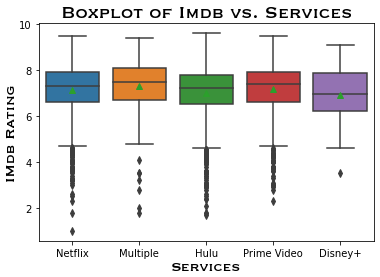

In [7]:
# Make Boxplot
sns.boxplot(x="Service", y="IMDb", data=tv, showmeans=True)

# Give our chart some labels and a title
plt.title("Boxplot of Imdb vs. Services",fontweight ="bold",fontsize=20, name="Copperplate" )
plt.xlabel('Services',fontsize=16, name="Copperplate")
plt.ylabel('IMdb Rating',fontsize=16, name="Copperplate")

plt.show()

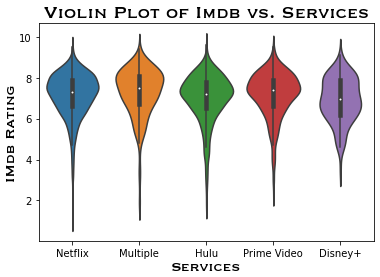

In [8]:
# Make violin plot
sns.violinplot(x="Service", y="IMDb", data=tv, showmeans=True)

# Give our chart some labels and a title
plt.title("Violin Plot of Imdb vs. Services",fontweight ="bold",fontsize=20, name="Copperplate" )
plt.xlabel('Services',fontsize=16, name="Copperplate")
plt.ylabel('IMdb Rating',fontsize=16, name="Copperplate")

plt.show()

In [9]:
# Extract individual groups
group1 = tv[tv["Service"] == "Netflix"]["IMDb"]
group2 = tv[tv["Service"] == "Hulu"]["IMDb"]
group3 = tv[tv["Service"] == "Prime Video"]["IMDb"]
group4 = tv[tv["Service"] == "Disney+"]["IMDb"]
group5 = tv[tv["Service"] == "Multiple"]["IMDb"]

In [10]:
# ANOVA test
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=7.701546310794659, pvalue=3.955907843985844e-05)

In [11]:
# T-tests between Netflix versus others
print(stats.ttest_ind(group1, group2, equal_var=False))
print(stats.ttest_ind(group1, group3, equal_var=False))
print(stats.ttest_ind(group1, group4, equal_var=False))

Ttest_indResult(statistic=3.6463060547800894, pvalue=0.00027137441595873345)
Ttest_indResult(statistic=-0.5045325817570749, pvalue=0.6139356461863421)
Ttest_indResult(statistic=2.570089063461629, pvalue=0.011013958199669294)


In [12]:
# T-tests between Hulu versus others
print(stats.ttest_ind(group2, group3, equal_var=False))
print(stats.ttest_ind(group2, group4, equal_var=False))

Ttest_indResult(statistic=-3.745669680387388, pvalue=0.00018427206685950345)
Ttest_indResult(statistic=0.8597998243815425, pvalue=0.390987056685557)


In [13]:
# T-tests between Prime Video versus Disney+
print(stats.ttest_ind(group3, group4, equal_var=False))

Ttest_indResult(statistic=2.7374605550047564, pvalue=0.006782744991005879)


y = -0.01x + 23.12
The correlation between both factors is -0.08


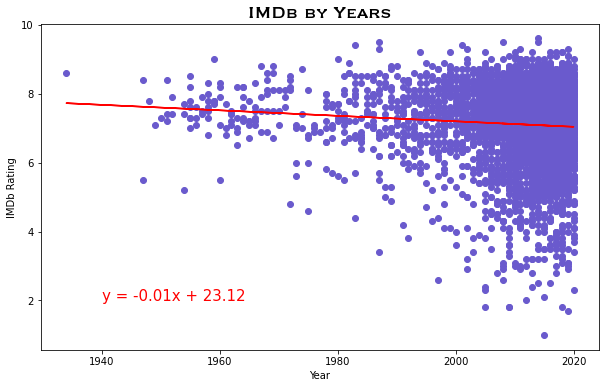

In [14]:
#Regression
tv_year = tv.iloc[:,1]
tv_imdb = tv.iloc[:,2]
tv_correlation = stats.pearsonr(tv_year,tv_imdb)

(slope, intercept, rvalue, pvalue, stderr) = linregress(tv_year,tv_imdb)


regress_values = tv_year * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.figure(figsize = (10,6))
plt.scatter(tv_year,tv_imdb,color="slateblue")
plt.plot(tv_year,regress_values,"r-")
plt.annotate(line_eq,(1940,2),fontsize=15,color="red")

# Give our chart some labels and a title
plt.title("IMDb by Years",fontweight ="bold",fontsize=20, name="Copperplate")
plt.xlabel('Year')
plt.ylabel('IMDb Rating')
print(f"The correlation between both factors is {round(tv_correlation[0],2)}")

plt.show()

Text(0.5, 1.0, 'CORRELATION MATRIX')

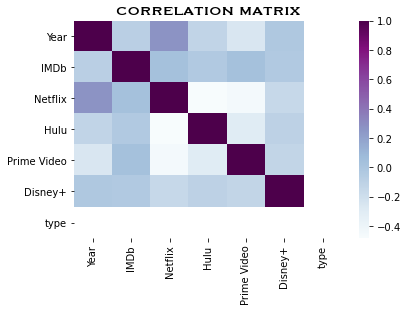

In [15]:
corrs = tv.corr()
sns.heatmap(corrs,cmap="BuPu")
title = 'CORRELATION MATRIX'
plt.title(title, loc='center', fontsize=16, fontweight='bold', name="Copperplate")

In [16]:
feature = tv[['Year', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']]
target = tv["IMDb"]
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IMDb   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     11.16
Date:                Wed, 11 Nov 2020   Prob (F-statistic):           1.05e-10
Time:                        18:44:50   Log-Likelihood:                -6838.0
No. Observations:                4450   AIC:                         1.369e+04
Df Residuals:                    4444   BIC:                         1.373e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.5903      3.281      7.495      0.000      18.158      31.023
Year           -0.0088      0.002     -5.389      0.000      -0.012      -0.006
Netflix         0.2363      0.064      3.690      0.000       0.111       0.362
Hulu            0.0613      0.061      0.999      0.318      -0.059       0.182
Prime Video     0.1720      0.064      2.696      0.007       0.047       0.297
Disney+        -0.0494      0.104     -0.476      0.634      -0.253       0.154
==============================================================================
Omnibus:                      900.314   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1887.198
Skew:                          -1.182   Prob(JB):                         0.00
Kurtosis:                       5.142   Cond. No.                     3.91e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
predictions = results.predict()
residuals = Y - predictions

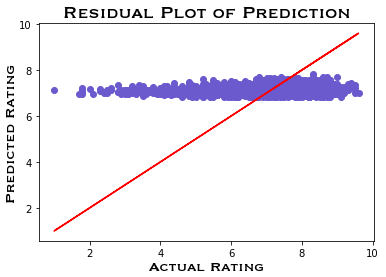

In [18]:
plt.scatter(Y, predictions, color="slateblue")
plt.plot(Y,Y,color="r")

# Give our chart some labels and a title
plt.title("Residual Plot of Prediction",fontweight ="bold",fontsize=20, name="Copperplate" )
plt.xlabel('Actual Rating',fontsize=16, name="Copperplate")
plt.ylabel('Predicted Rating',fontsize=16, name="Copperplate")

plt.show()

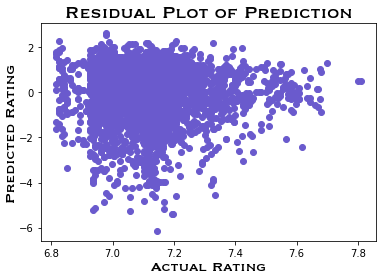

In [19]:
plt.scatter(predictions,residuals,color="slateblue")

# Give our chart some labels and a title
plt.title("Residual Plot of Prediction",fontweight ="bold",fontsize=20, name="Copperplate" )
plt.xlabel('Actual Rating',fontsize=16, name="Copperplate")
plt.ylabel('Predicted Rating',fontsize=16, name="Copperplate")

plt.show()

# Movies

In [20]:
movies.head()

,ID,Title,Year,Age,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors,Type
0,1,Inception,2010,13.0,8.8,1,0,0,0,Christopher Nolan,0
1,2,The Matrix,1999,18.0,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski",0
2,3,Avengers: Infinity War,2018,13.0,8.5,1,0,0,0,"Anthony Russo,Joe Russo",0
3,4,Back to the Future,1985,7.0,8.5,1,0,0,0,Robert Zemeckis,0
4,5,"The Good, the Bad and the Ugly",1966,18.0,8.8,1,0,1,0,Sergio Leone,0


In [21]:
service = []
for index,row in movies.iterrows():
    if (row['Netflix'] == 1) & (row['Hulu'] == 0) & (row['Prime Video'] == 0) & (row['Disney+'] == 0):
        service.append('Netflix')
    elif (row['Netflix'] == 0) & (row['Hulu'] == 1) & (row['Prime Video'] == 0) & (row['Disney+'] == 0):
        service.append('Hulu')
    elif (row['Netflix'] == 0) & (row['Hulu'] == 0) & (row['Prime Video'] == 1) & (row['Disney+'] == 0):
        service.append('Prime Video')
    elif (row['Netflix'] == 0) & (row['Hulu'] == 0) & (row['Prime Video'] == 0) & (row['Disney+'] == 1):
        service.append('Disney+')
    else:
        service.append("Multiple")
movies['Service'] = service

In [22]:
movies = movies.loc[:, ['Title', 'Year', 'IMDb', 'Netflix','Hulu','Prime Video','Disney+','Type','Service']]
movies = movies.dropna()
movies.head()

,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Service
0,Inception,2010,8.8,1,0,0,0,0,Netflix
1,The Matrix,1999,8.7,1,0,0,0,0,Netflix
2,Avengers: Infinity War,2018,8.5,1,0,0,0,0,Netflix
3,Back to the Future,1985,8.5,1,0,0,0,0,Netflix
4,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,0,Multiple


In [23]:
movie_service = movies.groupby("Service")

movie_count = movie_service["IMDb"].count()
movie_avg = movie_service["IMDb"].mean()
movie_med = movie_service["IMDb"].median()
movie_var = movie_service["IMDb"].var()
movie_std = movie_service["IMDb"].std()
movie_sem = movie_service["IMDb"].sem()

#build dataframe
summTable = pd.DataFrame()
summTable["Total Movies"] = movie_count
summTable["Average IMDb Score"] = movie_avg
summTable["Median IMDb Score"] = movie_med
summTable["Variance of IMDb Score"] = movie_var
summTable["St. Deviation of IMDb Score"] = movie_std
summTable["St. Error IMDb Score"] = movie_sem

summTable

,Total Movies,Average IMDb Score,Median IMDb Score,Variance of IMDb Score,St. Deviation of IMDb Score,St. Error IMDb Score
Service,,,,,,
Disney+,531,6.433333,6.5,1.016679,1.008305,0.043757
Hulu,630,6.152698,6.2,1.298999,1.139736,0.045408
Multiple,622,6.134084,6.2,1.368112,1.169663,0.046899
Netflix,3074,6.265322,6.4,1.277385,1.130214,0.020385
Prime Video,11316,5.752731,5.9,1.976898,1.406022,0.013217


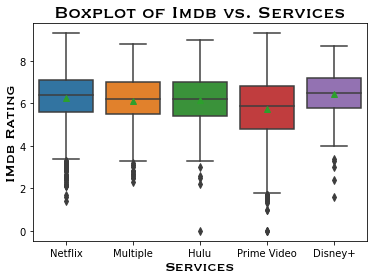

In [24]:
# Make Boxplot
sns.boxplot(x="Service", y="IMDb", data=movies, showmeans=True)

# Give our chart some labels and a title
plt.title("Boxplot of Imdb vs. Services",fontweight ="bold",fontsize=20, name="Copperplate" )
plt.xlabel('Services',fontsize=16, name="Copperplate")
plt.ylabel('IMdb Rating',fontsize=16, name="Copperplate")

plt.show()

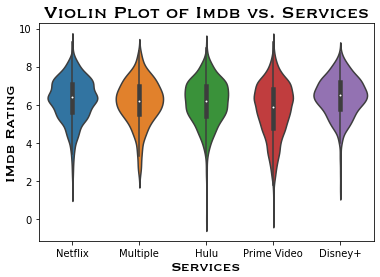

In [25]:
# Make Violin plot
sns.violinplot(x="Service", y="IMDb", data=movies, showmeans=True)

# Give our chart some labels and a title
plt.title("Violin Plot of Imdb vs. Services",fontweight ="bold",fontsize=20, name="Copperplate" )
plt.xlabel('Services',fontsize=16, name="Copperplate")
plt.ylabel('IMdb Rating',fontsize=16, name="Copperplate")

plt.show()

In [26]:
# Extract individual groups
group1 = movies[movies["Service"] == "Netflix"]["IMDb"]
group2 = movies[movies["Service"] == "Hulu"]["IMDb"]
group3 = movies[movies["Service"] == "Prime Video"]["IMDb"]
group4 = movies[movies["Service"] == "Disney+"]["IMDb"]
group5 = movies[movies["Service"] == "Multiple"]["IMDb"]

In [27]:
# ANOVA Test
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=158.6179780816189, pvalue=2.8476530893126106e-101)

In [28]:
# T-tests between Netflix versus others
print(stats.ttest_ind(group1, group2, equal_var=False))
print(stats.ttest_ind(group1, group3, equal_var=False))
print(stats.ttest_ind(group1, group4, equal_var=False))

Ttest_indResult(statistic=2.2627016336457446, pvalue=0.02389154620399159)
Ttest_indResult(statistic=21.098688237131842, pvalue=2.4683702188657623e-95)
Ttest_indResult(statistic=-3.480505317767598, pvalue=0.0005283213896018931)


In [29]:
# T-tests between Hulu versus others
print(stats.ttest_ind(group2, group3, equal_var=False))
print(stats.ttest_ind(group2, group4, equal_var=False))

Ttest_indResult(statistic=8.457277318492029, pvalue=1.4549328759689867e-16)
Ttest_indResult(statistic=-4.450289858269554, pvalue=9.403602923708048e-06)


In [30]:
# T-tests between Prime Video versus Disney+
print(stats.ttest_ind(group3, group4, equal_var=False))

Ttest_indResult(statistic=-14.889773928295442, pvalue=3.4320512233361647e-43)


y = -0.0x + 8.64
The correlation between both factors is -0.02


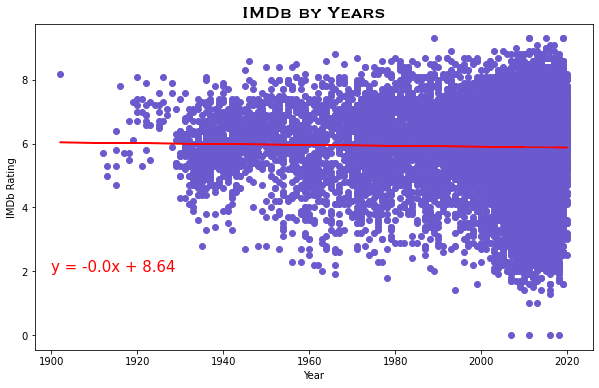

In [31]:
# Regression
movie_year = movies.iloc[:,1]
movie_imdb = movies.iloc[:,2]
movie_correlation = stats.pearsonr(movie_year,movie_imdb)

(slope, intercept, rvalue, pvalue, stderr) = linregress(movie_year,movie_imdb)


regress_values = movie_year * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
plt.figure(figsize = (10,6))
plt.scatter(movie_year,movie_imdb, color="slateblue")
plt.plot(movie_year,regress_values,"r-",color="red")
plt.annotate(line_eq,(1900,2),fontsize=15,color="red")

# Give our chart some labels and a title
plt.title("IMDb by Years",fontweight ="bold",fontsize=20, name="Copperplate" )
plt.xlabel('Year')
plt.ylabel('IMDb Rating')


print(f"The correlation between both factors is {round(movie_correlation[0],2)}")
plt.show()

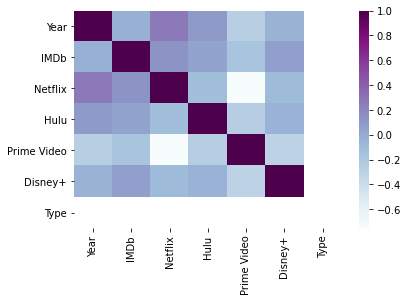

In [32]:
corrs = movies.corr()
sns.heatmap(corrs,cmap="BuPu")

In [33]:
feature = movies[['Year', 'Netflix', 'Hulu', 'Prime Video', 'Disney+']]
target = movies["IMDb"]
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IMDb   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     116.0
Date:                Wed, 11 Nov 2020   Prob (F-statistic):          6.13e-121
Time:                        18:44:54   Log-Likelihood:                -27491.
No. Observations:               16173   AIC:                         5.499e+04
Df Residuals:                   16167   BIC:                         5.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          14.9631      1.049     14.261      0.000      12.906      17.020
Year           -0.0045      0.001     -8.671      0.000      -0.006      -0.004
Netflix         0.4211      0.058      7.319      0.000       0.308       0.534
Hulu            0.3129      0.061      5.117      0.000       0.193       0.433
Prime Video    -0.1543      0.058     -2.673      0.008      -0.267      -0.041
Disney+         0.5225      0.079      6.634      0.000       0.368       0.677
==============================================================================
Omnibus:                      534.785   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              589.282
Skew:                          -0.468   Prob(JB):                    1.09e-128
Kurtosis:                       3.008   Cond. No.                     2.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
predictions = results.predict()
residuals = Y - predictions

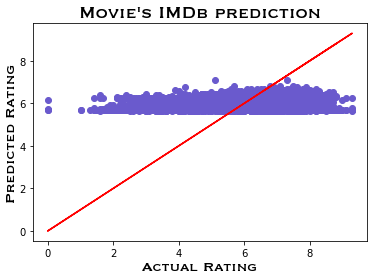

In [35]:
plt.scatter(Y, predictions, color="slateblue")
plt.plot(Y,Y, color = "r")

# Give our chart some labels and a title
plt.title("Movie's IMDb prediction",fontweight ="bold",fontsize=20, name="Copperplate" )
plt.xlabel('Actual Rating',fontsize=16, name="Copperplate")
plt.ylabel('Predicted Rating',fontsize=16, name="Copperplate")


plt.show()

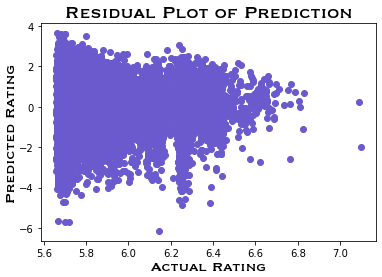

In [36]:
plt.scatter(predictions,residuals, color="slateblue")

# Give our chart some labels and a title
plt.title("Residual Plot of Prediction",fontweight ="bold",fontsize=20, name="Copperplate" )
plt.xlabel('Actual Rating',fontsize=16, name="Copperplate")
plt.ylabel('Predicted Rating',fontsize=16, name="Copperplate")

plt.show()